In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython import nominal
%matplotlib inline
sns.set_palette('pastel')

# $$ Exploring Data $$


# Data Loading

In [2]:
import os

os.environ["HOST_URL"] = "http://51.91.251.0:3000"
os.environ["USER_ID"] = "f89fec0b-183b-4921-bf15-197101c14192"
os.environ["SQL_USERNAME"] = "postgres"
os.environ["SQL_PASSWORD"] = "^de<@TETh~}*;:/*"
os.environ["SQL_HOST"] = "34.155.175.170"
os.environ["SQL_PORT"] = "5432"
os.environ["SQL_SCRAPE_DATABASE"] = "scrape"

from defi_ai import (
    Avatar,
    Hotel,
    Request,
    Response,
    City,
    Language,
    Sample,
    init_session,
)

Session = init_session()
session = Session()

In [3]:
df = Request.load_dataset(session, False, False, True)
df["language"] = df["language"].astype("category")
df["city"] = df["city"].astype("category")
df["group"] = df["group"].astype("category")
df["brand"] = df["brand"].astype("category")
df["children_policy"] = df["children_policy"].astype("category")
df["hotel_id"] = df["hotel_id"].astype("category")

In [4]:
df.head()

,language,city,date,mobile,hotel_id,group,brand,parking,pool,children_policy,...,request_language_count,request_city_count,request_date_count,request_mobile_count,hotel_city_count,hotel_brand_count,hotel_group_count,hotel_city_group_count,hotel_city_brand_count,price
0,french,paris,2,True,580,Boss Western,Boss Western,False,False,0,...,1,1,1,1,167,87,163,29,14,130
1,french,paris,2,True,573,Chillton Worldwide,Chill Garden Inn,True,True,1,...,1,1,1,1,167,34,103,16,4,344
2,french,paris,2,True,722,Yin Yang,Ardisson,True,False,0,...,1,1,1,1,167,51,166,24,6,178
3,french,paris,2,True,576,Morriott International,Morriot,False,False,0,...,1,1,1,1,167,42,128,25,7,227
4,french,paris,2,True,123,Boss Western,Boss Western,False,False,0,...,1,1,1,1,167,87,163,29,14,155


In [5]:
hotel = df.drop(['language', 'date', 'mobile', 'request_count',
       'request_language_count', 'request_city_count', 'request_date_count',
       'request_mobile_count', 'hotel_city_count', 'hotel_brand_count',
       'hotel_group_count', 'hotel_city_group_count', 'hotel_city_brand_count',
       'price','stock'],axis =1)

In [6]:
df = df.drop(['request_count',
       'request_language_count', 'request_city_count', 'request_date_count',
       'request_mobile_count', 'hotel_city_count', 'hotel_brand_count',
       'hotel_group_count', 'hotel_city_group_count', 'hotel_city_brand_count'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315788 entries, 0 to 1315787
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   language         1315788 non-null  category
 1   city             1315788 non-null  category
 2   date             1315788 non-null  int64   
 3   mobile           1315788 non-null  bool    
 4   hotel_id         1315788 non-null  category
 5   group            1315788 non-null  category
 6   brand            1315788 non-null  category
 7   parking          1315788 non-null  bool    
 8   pool             1315788 non-null  bool    
 9   children_policy  1315788 non-null  category
 10  stock            1315788 non-null  int64   
 11  price            1315788 non-null  int64   
dtypes: bool(3), category(6), int64(3)
memory usage: 42.7 MB


In [8]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315788 entries, 0 to 1315787
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   city             1315788 non-null  category
 1   hotel_id         1315788 non-null  category
 2   group            1315788 non-null  category
 3   brand            1315788 non-null  category
 4   parking          1315788 non-null  bool    
 5   pool             1315788 non-null  bool    
 6   children_policy  1315788 non-null  category
dtypes: bool(2), category(5)
memory usage: 10.1 MB


# Data Exploring

## Correlation heatmap

Firstly, take a look at the correlation heatmap for visualize the strength of relationships between all of the variables

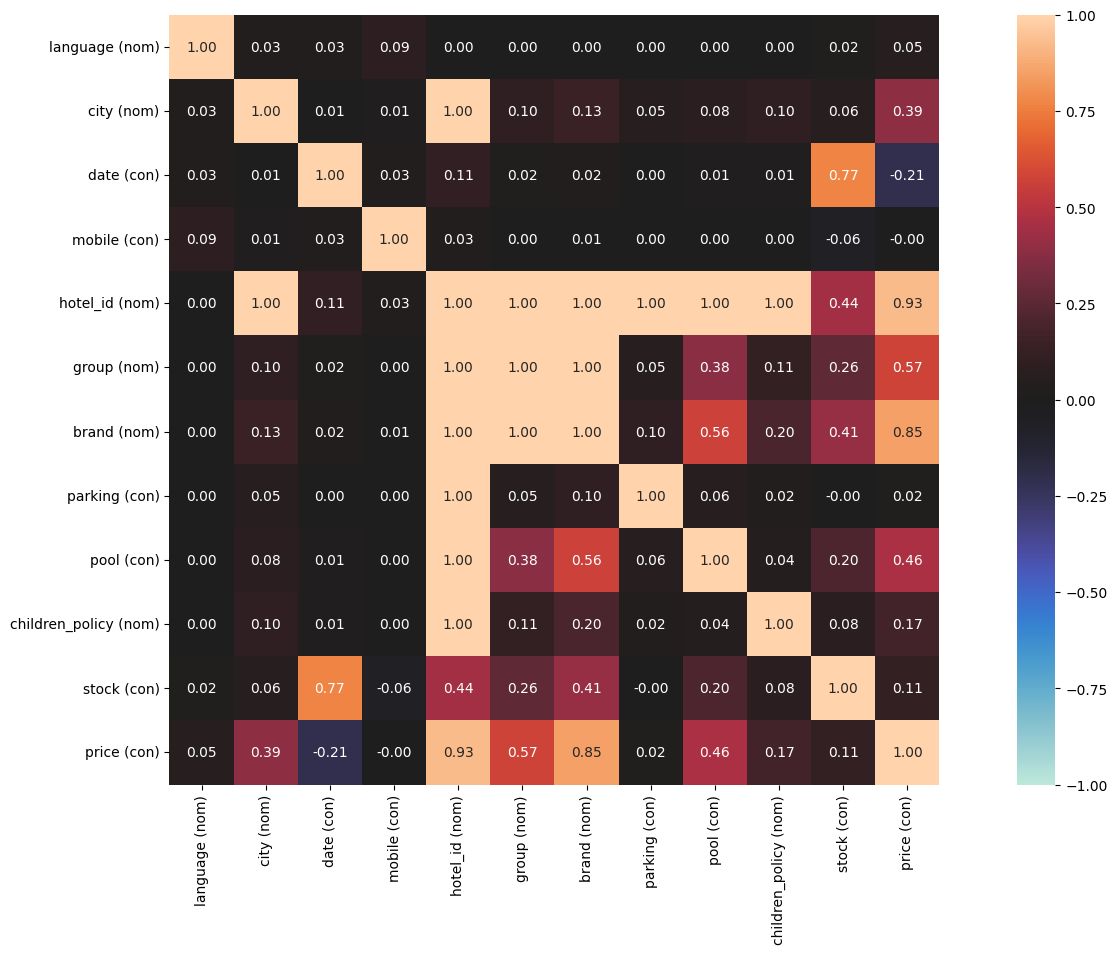

In [9]:
nominal.associations(df,figsize=(20,10),mark_columns=True)
plt.show()

From the heatmap, we can indicate some variables that have strong relation toward $price$.

## Exploration of strong impact elements 

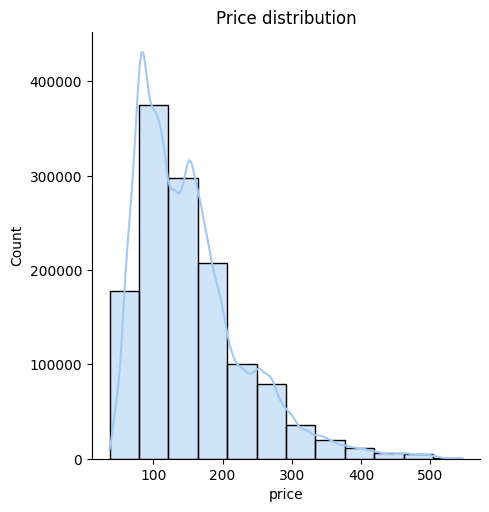

In [10]:
sns.displot(data=df, x="price", bins=12,kde=True)
plt.title("Price distribution")
plt.show()

<AxesSubplot: xlabel='date', ylabel='price'>

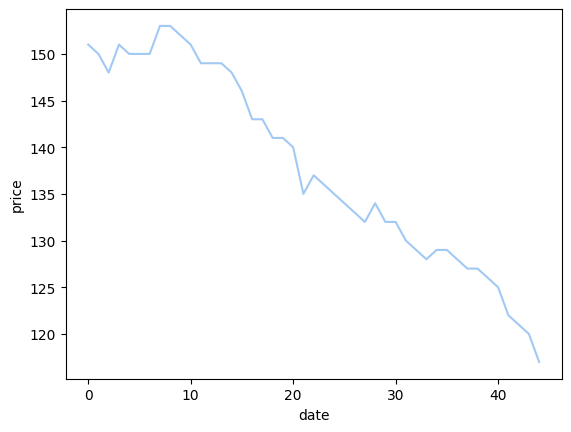

In [11]:
sns.lineplot(pd.DataFrame(df.groupby('date')['price'].median()),x='date',y='price')

As we can see, the price drops as expected as the searching time is close to the date.

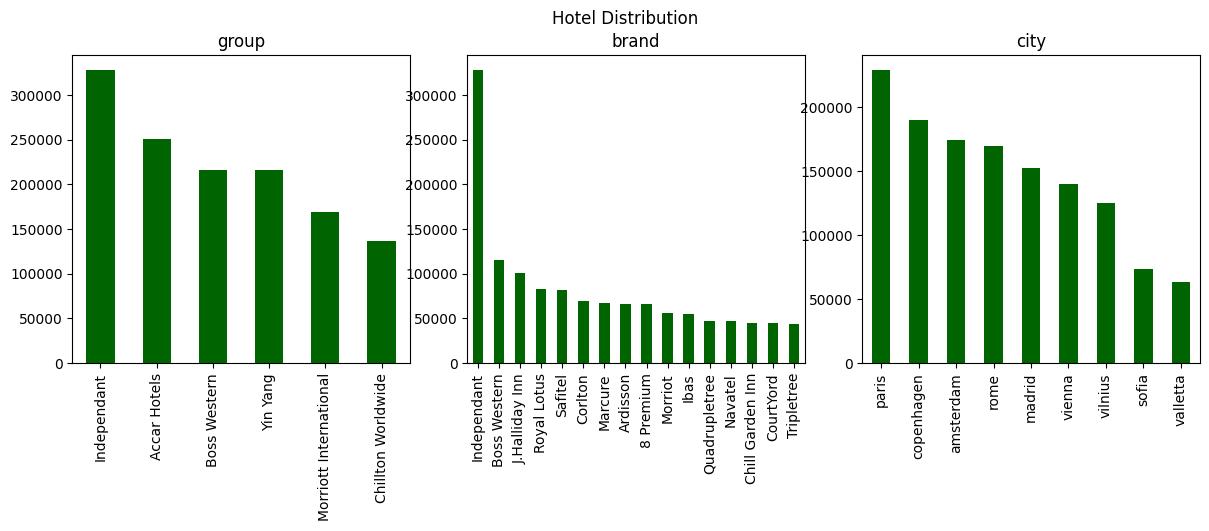

In [12]:
cols = ['group','brand','city']
fig, axs = plt.subplots(1, 3, figsize = (12,4))
fig.suptitle("Hotel Distribution")
fig.tight_layout()
for i,col in enumerate(hotel[cols]):
    hotel[col].value_counts().plot(kind="bar",color='DarkGreen', ax=axs[i]).set_title(col)
plt.show()


We are encoding categorical elements for better visualization of the 3 categorical variables.

In [13]:
cols = ['city','group','brand','language']
for col in cols:
    # print(df[col].value_counts().index)
    df[col].replace(df[col].value_counts().index,
                        (np.linspace(1,len(df[col].value_counts().index),len(df[col].value_counts().index))).astype(int), inplace=True)


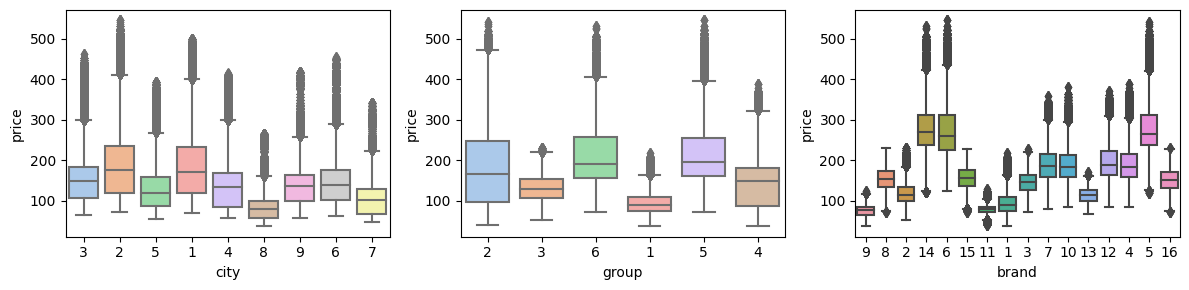

In [14]:
fig, axs = plt.subplots(1, 3, figsize = (12,3))
cols = ['city','group','brand']
for i,col in enumerate(cols):
    sns.boxplot(data=df, x=col, y='price',ax=axs[i])
plt.tight_layout()

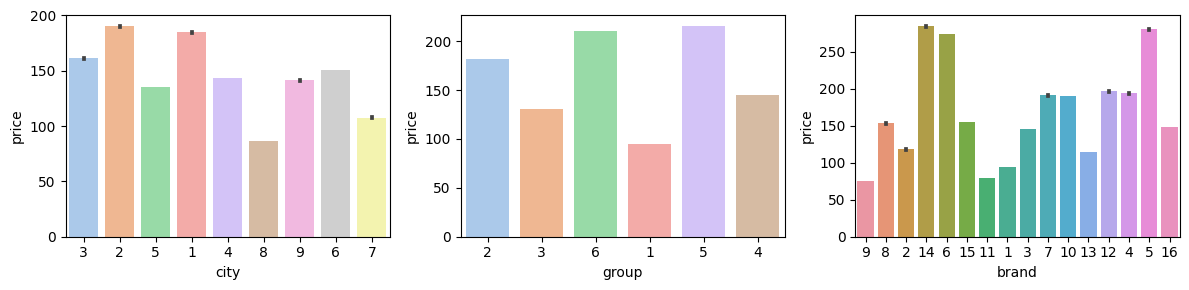

In [15]:
fig, axs = plt.subplots(1, 3, figsize = (12,3))
cols = ['city','group','brand']
for i,col in enumerate(cols):
    sns.barplot(x=df[col],y=df['price'],ax=axs[i])
plt.tight_layout()

A noticeable impact on the price of hotels with the change of these 3 variables.